In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def bias_mult(n):
    return (gamma(n + 1/2)*gamma(n - 1/2))/((gamma(n))**2)

def T_variance(n, theta):
    return n*theta/((n-1)*bias_mult(n)**2) - theta / bias_mult(n)

def best_special_variance(n, theta):
    alpha_min = (n-2)/(2*n-2)
    return 1/((n-2)*n) * (n*(theta**2)*(alpha_min**2) + (n-2)*(theta**2)*(1-2*alpha_min+alpha_min**2))

def main():
    ns = np.arange(3, 100)
    thetas = np.linspace(3, 10, 30)
    #diffs, _ = np.meshgrid(thetas, ns)
    is_all_positive = True
    is_all_negative = True
    for i,n in enumerate(ns):
        for j,theta in enumerate(thetas):
            diff = T_variance(n, theta) - best_special_variance(n, theta)
            diffs[i][j] = diff
            if diff < 0:
                is_all_positive = False
            else:
                is_all_negative = False
    
    
    #print("Is negative? " + str(is_all_negative) + " Is positive? " + str(is_all_positive))
    #fig = plt.figure(figsize=plt.figaspect(0.5))
    #ax = fig.add_subplot(1, 2, 1, projection='3d')
    #ax.plot_surface(X=ns, Y=thetas, Z=diffs, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    #ax.view_init(60,45)
    plt.imshow(diffs)
    return diffs

In [ ]:
matplotlib.__version__

In [1]:
import matplotlib as m
m.__version__

'3.1.1'

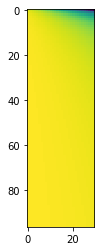

In [30]:
diffs = main()


In [19]:
sum(sum(np.isnan(diffs)))

0

In [20]:
diffs

array([[   -1,    -2,    -4, ..., -2320, -2369, -2418],
       [    0,    -1,    -3, ..., -1546, -1578, -1611],
       [    0,    -1,    -2, ..., -1159, -1183, -1208],
       ...,
       [    0,     0,     0, ...,   -48,   -49,   -50],
       [    0,     0,     0, ...,   -47,   -48,   -49],
       [    0,     0,     0, ...,   -47,   -48,   -49]])